# House Price Prediction
### Regression using Feature Engineering and Gradient Boosting

**Objective:** Predict house prices using engineered features and advanced regression models.

**Dataset:** Boston Housing Dataset (from scikit-learn).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing # Changed from load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data
# data = load_boston() # Removed load_boston
housing = fetch_california_housing() # Added fetch_california_housing
X = pd.DataFrame(housing.data, columns=housing.feature_names) # Updated to use housing
y = housing.target # Updated to use housing

print('Data Shape:', X.shape)
display(X.head()) # Use display for better formatting

Data Shape: (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)

y_pred = gbr.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

RMSE: 0.54
R2 Score: 0.78


In [6]:

# Compare with Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest RMSE: {rf_rmse:.2f}')
print(f'Random Forest R2: {rf_r2:.2f}')

Random Forest RMSE: 0.51
Random Forest R2: 0.81


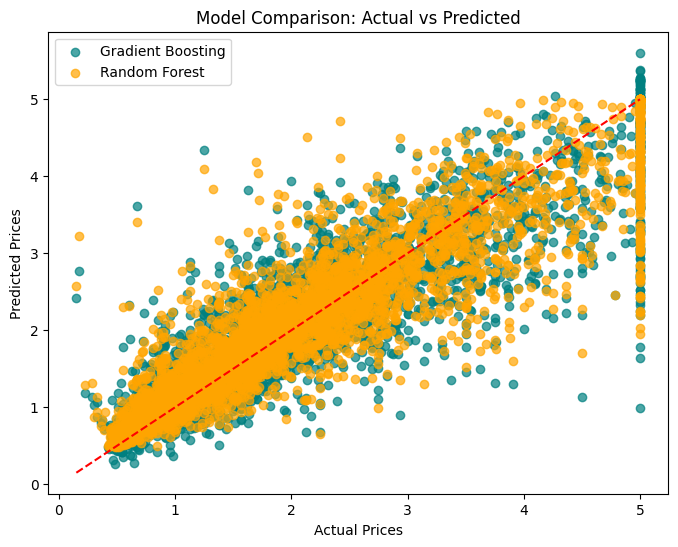

In [7]:

# Visualization of predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal', label='Gradient Boosting')
plt.scatter(y_test, rf_pred, alpha=0.7, color='orange', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Comparison: Actual vs Predicted')
plt.legend()
plt.show()